In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [2]:
# Load the data
data = pd.read_csv(r"C:\Users\iamaa\OneDrive\Documents\GitHub\landslide_prediction\dataset.csv")

# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190890 entries, 0 to 190889
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Landslide      190890 non-null  int64  
 1   Aspect         190890 non-null  float64
 2   Curvature      190890 non-null  float64
 3   Earthquake     190890 non-null  float64
 4   Elevation      190890 non-null  float64
 5   Flow           190890 non-null  float64
 6   Lithology      190890 non-null  float64
 7   NDVI           190890 non-null  float64
 8   NDWI           190890 non-null  float64
 9   Plan           190890 non-null  float64
 10  Precipitation  190890 non-null  float64
 11  Profile        190890 non-null  float64
 12  Slope          190890 non-null  float64
 13  temperature    190890 non-null  float64
 14  humidity       190890 non-null  float64
 15  rain           190890 non-null  float64
 16  moisture       190890 non-null  float64
 17  pressure       190890 non-nul

In [3]:
# Display summary statistics
print(data.describe())

           Landslide         Aspect      Curvature     Earthquake  \
count  190890.000000  190890.000000  190890.000000  190890.000000   
mean        0.050574       2.969244       3.116282       2.011137   
std         0.219126       0.765253       0.594621       0.411790   
min         0.000000       1.000000       1.000000       1.000000   
25%         0.000000       2.333333       2.666667       1.666667   
50%         0.000000       3.000000       3.000000       2.000000   
75%         0.000000       3.666667       3.666667       2.333333   
max         1.000000       5.000000       5.000000       3.000000   

           Elevation           Flow      Lithology           NDVI  \
count  190890.000000  190890.000000  190890.000000  190890.000000   
mean        2.588224       2.549421       2.073608       2.942134   
std         0.719438       0.718338       0.904329       0.762600   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.0000

In [4]:
# Check for missing values
print(data.isnull().sum())

Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
temperature      0
humidity         0
rain             0
moisture         0
pressure         0
dtype: int64


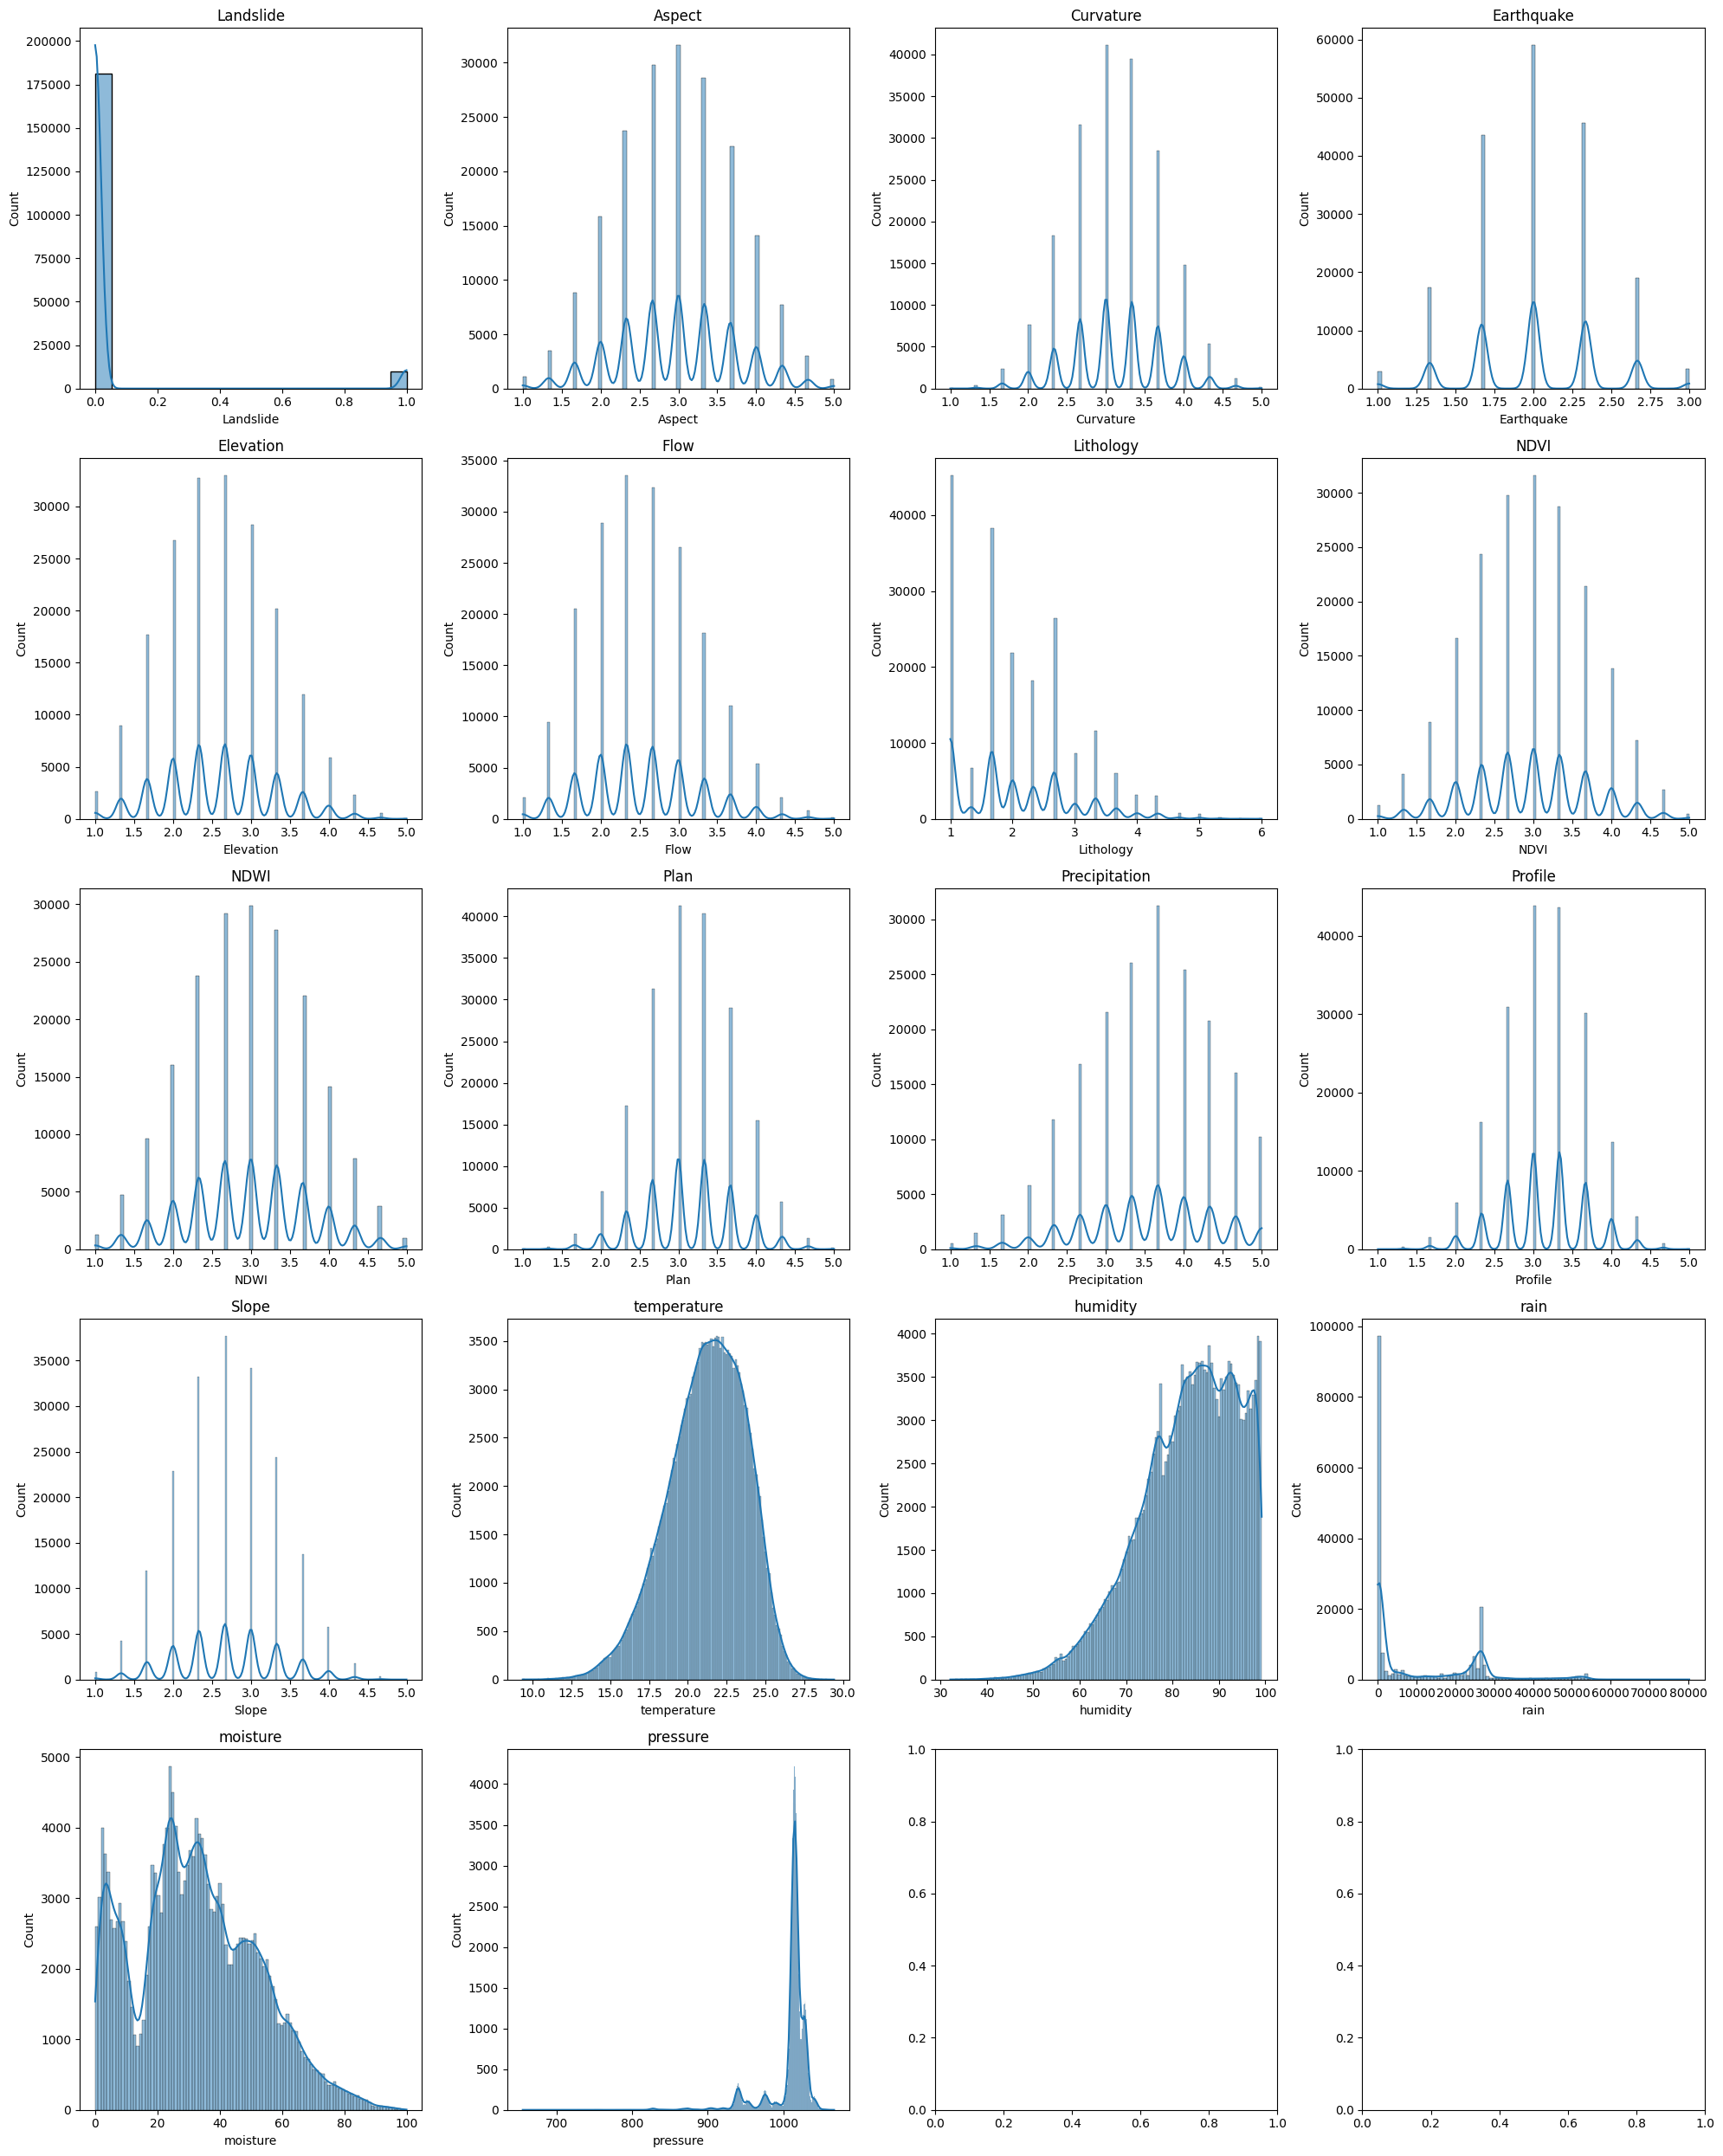

In [5]:
# Visualize the distribution of features
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()
for idx, col in enumerate(data.columns):
    if idx < 20:  # Limit to 20 plots
        sns.histplot(data[col], ax=axes[idx], kde=True)
        axes[idx].set_title(col)
plt.tight_layout()
plt.savefig('feature_distribution.png')
plt.show()
plt.close()

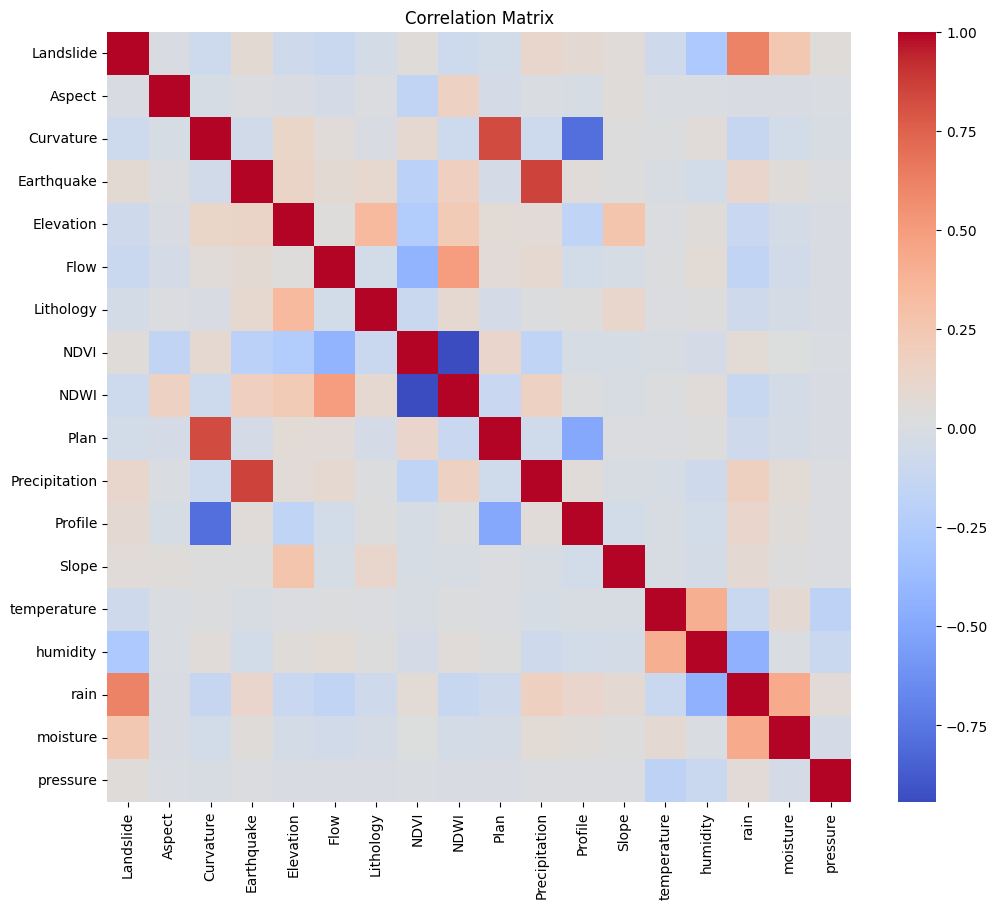

In [6]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()

In [7]:
# Separate features and target
X = data.drop('Landslide', axis=1)
y = data['Landslide']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Convert the scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display the first few rows of the scaled training data
print("\nFirst few rows of scaled training data:")
print(X_train_scaled.head())


First few rows of scaled training data:
     Aspect  Curvature  Earthquake  Elevation      Flow  Lithology      NDVI  \
0  0.039632   0.925971   -0.027943   1.497900 -0.299595   1.388881  0.076697   
1  0.475172  -0.196921    1.592123  -0.355596  1.093181  -0.451443 -0.797701   
2 -0.831449   2.048862    2.402156   1.497900 -1.692372   3.597270 -0.360502   
3  1.346253   0.364525   -0.027943   0.107778  0.164664   1.388881  0.951096   
4  0.039632  -1.881258   -0.027943  -0.818969  1.093181  -1.187572 -0.797701   

       NDWI      Plan  Precipitation   Profile     Slope  temperature  \
0  0.052671  0.899390       0.152935 -0.848047  0.456888    -0.762918   
1  0.472915 -0.236931       1.348113  0.967819 -1.599335     0.038531   
2  0.052671  0.899390       1.746506 -2.663914 -0.057168    -0.010606   
3 -0.787817 -0.236931       0.551327 -0.242758 -2.113390     1.003006   
4  0.472915 -0.805091      -0.245458  0.967819  1.484999     1.059910   

   humidity      rain  moisture  pressu

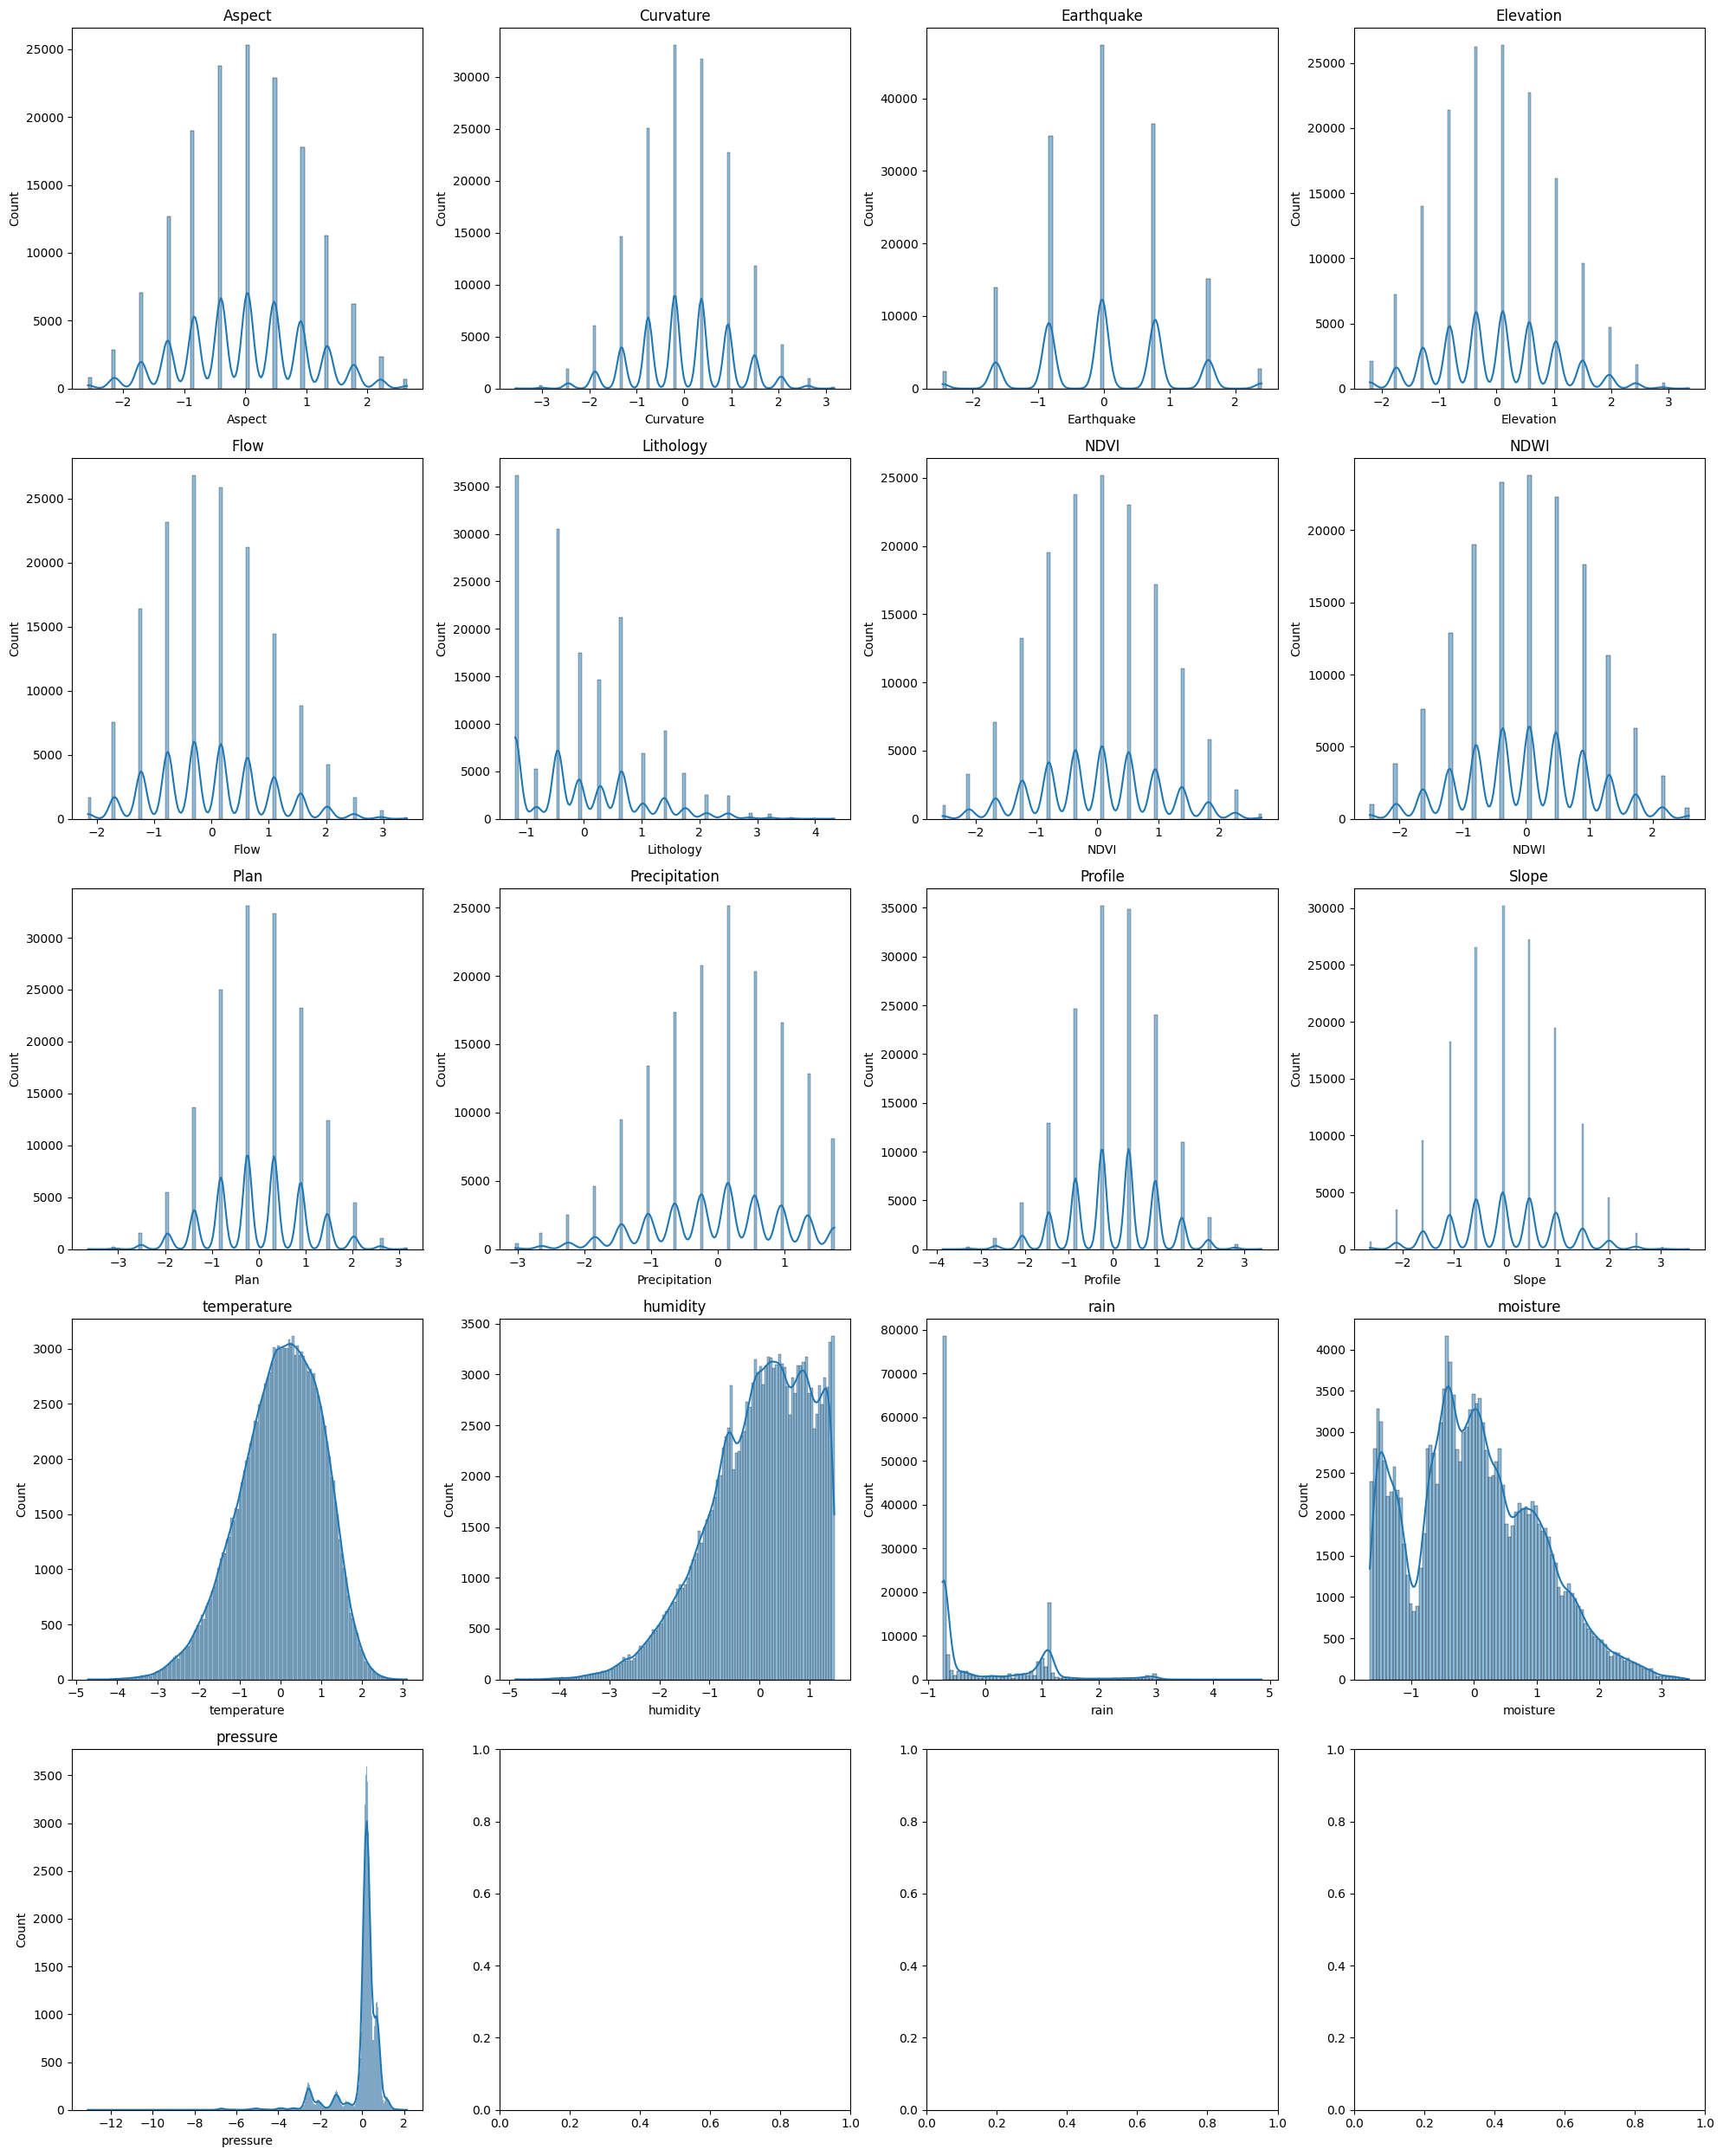

In [10]:
# Visualize the distribution of scaled features
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.ravel()
for idx, col in enumerate(X_train_scaled.columns):
    if idx < 20:  # Limit to 20 plots
        sns.histplot(X_train_scaled[col], ax=axes[idx], kde=True)
        axes[idx].set_title(col)
plt.tight_layout()
plt.savefig('scaled_feature_distributions.png')
plt.show()
plt.close()

In [11]:
# Save the preprocessed data
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

print("Data preprocessing completed and saved.")

Data preprocessing completed and saved.
